In [13]:
import numpy as np
from numpy.random import random as srand
import matplotlib.pyplot as plt
from scipy.stats import mode
import json
import multiprocessing

In [28]:
def pbil(F, d, N, th1, th2, th3, steps=500):
    
    def random_pop(p, d, N):
        population = srand((d, N))
        return population < p
    
    def get_score(scores):
        return np.max(scores), np.mean(scores), np.min(scores)
    
    
    plot_probs = []
    plot_scores = []
    
    p = np.ones((d, 1)) / 2
    population = random_pop(p, d, N)
    result = F(population)
    
    plot_probs.append(p)
    plot_scores.append(get_score(result))
    
    for _ in range(steps - 1):
        print(_)
        best = population[:, [np.argmax(result)]]
        p = p * (1 - th1) + best * th1
        
        if_change = srand((d,1)) < th2
        p = p * (1 - if_change) + (
            (if_change) * (
                p * (1 - th3)
                + (srand((d,1)) < 0.5) * th3
            )
        )
        
        population = random_pop(p, d, N)
        result = F(population)
        
        plot_probs.append(p)
        plot_scores.append(get_score(result))
        np.save('data/data-score', np.array(plot_scores))
        np.save('data/data-probs', np.array(plot_probs))
            
    return np.array(plot_scores), np.array(plot_probs)
        
def plot_results(scores, probs, title=""):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(title)
    for i in range(scores.shape[1]):
        axs[0].plot(range(scores.shape[0]), scores[:, i])
    
    for i in range(probs.shape[1]):
        axs[1].plot(range(probs.shape[0]), probs[:,i,0])
    plt.show()

In [3]:
data = np.loadtxt('data/ImageRawReduced.txt')
targets = np.loadtxt('data/ImageExpertReduced.txt')
rules = np.loadtxt('data/ClassificationRules.txt')
data.shape, targets.shape, rules.shape

((3, 9350), (9350,), (266, 9350))

In [19]:
def spectF(x):
    good = rules[:,:,np.newaxis] * x[:,np.newaxis]
    good[good==0] = float("nan")
    a = mode(good, nan_policy="omit")[0][0,:,:]
    return np.sum(np.equal(a, np.ones(a.shape) * targets[:,np.newaxis]), axis=0)

def process_instance(rules_mask):
            return (mode(
                rules[rules_mask],
                axis=0
            )[0] == targets).sum()
    
def f(pop):
    pop = pop.T
    res = np.zeros((pop.shape[0], targets.size))
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        res = pool.map(process_instance, [x for x in pop])
    return np.array(res)

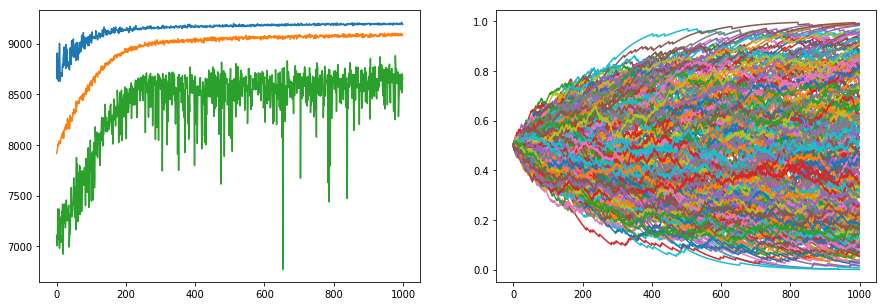

In [32]:
args = {
    'F':f,
    'd':rules.shape[0],
    'N':125,
    'th1':0.01,
    'th2':0.01,
    'th3':0.01,
    'steps':1000
}
# plot_results(*pbil(**args))

plot_results(scores, probs)

In [ ]:
args = {
    'F':f,
    'd':rules.shape[0],
    'N':125,
    'th1':0.01,
    'th2':0.001,
    'th3':0.01,
    'steps':20000
}
plot_results(*pbil(**args))

0
1
2
3
4


In [2]:
args = {
    'F':f,
    'd':rules.shape[0],
    'N':125,
    'th1':0.1,
    'th2':0.07,
    'th3':0.05,
    'steps':1000
}
plot_results(*pbil(**args))